<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M5Sesi%C3%B3n7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Módulo 5**
Machine Learning

**Sesión 7**
Arena de clasificadores

Sesión pasada

**Reto 03**
Árboles de decisiones

Generar desde cero árboles de decisión y random forests para generar predicciones. 
- Usaremos el dataset de Breast Cancer Wisconsin (Diagnostic) Data Set para el presente reto.

In [30]:
#Librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from sklearn.model_selection import cross_val_score

**Paso 1.** Cargar datos y hacer un EDA para conocer nuestros datos.

In [38]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2005.%20%C3%81rboles%20de%20decisi%C3%B3n_/Reto%2003/data.csv', header = 0)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


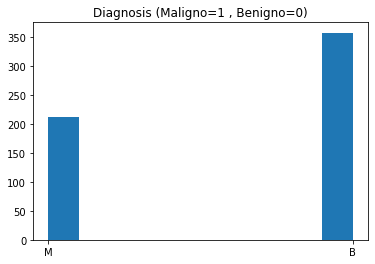

In [39]:
# Veamos las dimensiones de diagnósticos de cancer de seno
dataset.describe()
plt.hist(dataset['diagnosis'])
plt.title('Diagnosis (Maligno=1 , Benigno=0)')
plt.show()

In [41]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Paso 2.**
Usar train_test_split de sci-kit learn para crear un spliting con una propoción de 70-30 % para training y testing.

Nota: no use en este caso cuatro, sino solo dos variables.

In [42]:
traindf, testdf = train_test_split(dataset, test_size = 0.3)

**Paso 3.**
Función de clasificación y validación.

In [43]:
def classification_model(model, dataset, predictors, outcome):
  #Hacer fit en la data a usar:
  model.fit(dataset[predictors],dataset[outcome])
  
  #Generar prediccion con el training dataset:
  predictions = model.predict(dataset[predictors])
  
  # Que nos diga la precisión
  accuracy = metrics.accuracy_score(predictions,dataset[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

**Paso 4.**

- Generar un árbol de decisión (no lo gráfiques por el momento). Usar la función definida como 'classification_model' para evaluar el arbol generado. 
- Generar una variable con un sólo elemento llamada 'predictor_var' en forma de lista con los siguientes elementos:
  - 'radius_mean'
  - 'perimeter_mean'
  - 'area_mean'
  - 'compactness_mean'
  - 'concave points_mean'
- Hacer un loop o repite hasta 2 veces la función que generaste parae revisar la precisión con cada uno de ellos, para dos diferentes elementos que puedan estar contenidos en 'predictor_var'
- Definir una variable llamada outcome_var que este igualada a 'diagnosis'.
- Definir una variable llamada 'model' la cual almacene un DecisionTreeClassifier(), y despues embonalo en tu 'classification_model'

In [44]:
predictor_var = ['radius_mean']
outcome_var='diagnosis'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 97.236%


In [45]:
predictor_var = ['perimeter_mean']
outcome_var='diagnosis'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 98.995%


In [46]:
predictor_var = ['area_mean']
outcome_var='diagnosis'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 98.995%


In [47]:
predictor_var = ['compactness_mean']
outcome_var='diagnosis'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 97.990%


In [48]:
predictor_var = ['concave points_mean']
outcome_var='diagnosis'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%


**Paso 5.**
Generar un random forest con todos los valores posibles dentro de la variable lista 'predictor_var', y probar la precisión con la función classification_model generada en pasos anteriores. No es necesario graficar el árbol. Solo definir el random forest y prober la precisión.

In [50]:
# Usar todas las características para generar tu árbol de decisión
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 93.970%


**Reto 2**

El reto consta de que generes una red neuronal con solo 3 variables:

1. Número de embarazos
2. Concentración de glucosa en la plasma sanguínea a 2 horas en una prueba oral
3. Presión sanguínea diastólica (mm Hg)
Su reto es:

Generar una red neuronal con 2 layers de neuronas que generen una dendrita de salida binaria para clasificar los nuevos casos observados como 1 (diabético) o 0 (no diabético).
Probar su modelo con al menos 5 observaciones del data set que usted ya tiene
Recuerde que la última variable es la dummy

In [3]:
# Librerías
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib as mp
import seaborn as sns

**Paso 1**
Carga los datos. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2006.%20Redes%20Neuronales_/Reto%2002/diabeticosReto.csv", sep=",", header=None)
df.head()

,0,1,2,3
0,6,148,72,1
1,1,85,66,0
2,8,183,64,1
3,1,89,66,0
4,0,137,40,1


In [5]:
df.columns = ["num_embarazo", "glucosa", "presion", "diabetico"]
df.head()

,num_embarazo,glucosa,presion,diabetico
0,6,148,72,1
1,1,85,66,0
2,8,183,64,1
3,1,89,66,0
4,0,137,40,1


**Paso 2**
Genere un breve EDA que incluya:
- 3 gráficas de las 3 distintas variables para el reto

Una exploración de la distirbución de las variables, o que ayude a comprender las dimensiones de las 3 variables que está usted por usar para generar su red neuronal.

9 Variable dummy. haga print de ella

In [7]:
df.describe()

,num_embarazo,glucosa,presion,diabetico
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,0.348958
std,3.369578,31.972618,19.355807,0.476951
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000
50%,3.000000,117.000000,72.000000,0.000000
75%,6.000000,140.250000,80.000000,1.000000
max,17.000000,199.000000,122.000000,1.000000


In [8]:
df.size

3072

In [19]:
dataset = loadtxt("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2006.%20Redes%20Neuronales_/Reto%2002/diabeticosReto.csv", delimiter=",")
print(dataset[:,3])

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

(X) serán las variables explicativas y (y) la dicótomica, pero solo usaremos:
1. Número de embarazos
2. Concentración de glucosa en la plasma sanguínea a 2 horas en una prueba oral
3. Presión sanguínea diastólica (mm Hg)

Defina aquí debajo sus variables de entrenamiento

In [24]:
# Aislar Dummy en y; en X almacenar todas las demás
X = dataset[:,0:3]
y = dataset[:,3]

**Paso 3**
Defina la red neuronal con la ayuda de Keras. Recuerde, intento y error.
- Definir el modelo de Keras.

In [27]:
#Modelos de ML se inicializan vacíos
red_neuronal = Sequential()
#Agregar primer layer con Dense
red_neuronal.add(Dense(12, input_dim=3, activation="relu"))
red_neuronal.add(Dense(8, activation="relu"))
red_neuronal.add(Dense(1, activation="sigmoid"))

In [28]:
#Compilar
red_neuronal.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
red_neuronal.fit(X,y, epochs=46, batch_size=300)

Epoch 1/46
3/3 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7279
Epoch 2/46
3/3 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7305
Epoch 3/46
3/3 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7292
Epoch 4/46
3/3 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7292
Epoch 5/46
3/3 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7318
Epoch 6/46
3/3 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7292
Epoch 7/46
3/3 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7305
Epoch 8/46
3/3 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7292
Epoch 9/46
3/3 [==============================] - 0s 4ms/step - loss: 0.5445 - accuracy: 0.7305
Epoch 10/46
3/3 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7292
Epoch 11/46
3/3 [======================

**Paso 5**
Evalue la la precisión del modelo

In [37]:
#Print de accuracy
_, accuracy = red_neuronal.evaluate(X,y)
print("Accuracy: %.2f" % (accuracy*100))

24/24 [==============================] - 0s 934us/step - loss: 0.5433 - accuracy: 0.7292
Accuracy: 72.92


In [38]:
#Clasificación
new_rd = red_neuronal.predict_classes(X)

for i in range(len(X)):
  print("X=%s, Predicted=%s" % (X[i], new_rd[i]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


X=[  6. 148.  72.], Predicted=[1]
X=[ 1. 85. 66.], Predicted=[0]
X=[  8. 183.  64.], Predicted=[1]
X=[ 1. 89. 66.], Predicted=[0]
X=[  0. 137.  40.], Predicted=[1]
X=[  5. 116.  74.], Predicted=[0]
X=[ 3. 78. 50.], Predicted=[0]
X=[ 10. 115.   0.], Predicted=[0]
X=[  2. 197.  70.], Predicted=[1]
X=[  8. 125.  96.], Predicted=[0]
X=[  4. 110.  92.], Predicted=[0]
X=[ 10. 168.  74.], Predicted=[1]
X=[ 10. 139.  80.], Predicted=[1]
X=[  1. 189.  60.], Predicted=[1]
X=[  5. 166.  72.], Predicted=[1]
X=[  7. 100.   0.], Predicted=[0]
X=[  0. 118.  84.], Predicted=[0]
X=[  7. 107.  74.], Predicted=[0]
X=[  1. 103.  30.], Predicted=[0]
X=[  1. 115.  70.], Predicted=[0]
X=[  3. 126.  88.], Predicted=[0]
X=[ 8. 99. 84.], Predicted=[0]
X=[  7. 196.  90.], Predicted=[1]
X=[  9. 119.  80.], Predicted=[0]
X=[ 11. 143.  94.], Predicted=[0]
X=[ 10. 125.  70.], Predicted=[1]
X=[  7. 147.  76.], Predicted=[1]
X=[ 1. 97. 66.], Predicted=[0]
X=[ 13. 145.  82.], Predicted=[1]
X=[  5. 117.  92.], Predicted

**Paso 6**
Junte todos los pedazos de código y corra el script.
- Vamos a Proyectar

In [42]:
#Clasificación
new_rd = red_neuronal.predict_classes(X)

for i in range(len(X)):
  print("X=%s, Predicted=%s, Real=%s" % (X[i], new_rd[i], y[i]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


X=[  6. 148.  72.], Predicted=[1], Real=1.0
X=[ 1. 85. 66.], Predicted=[0], Real=0.0
X=[  8. 183.  64.], Predicted=[1], Real=1.0
X=[ 1. 89. 66.], Predicted=[0], Real=0.0
X=[  0. 137.  40.], Predicted=[1], Real=1.0
X=[  5. 116.  74.], Predicted=[0], Real=0.0
X=[ 3. 78. 50.], Predicted=[0], Real=1.0
X=[ 10. 115.   0.], Predicted=[0], Real=0.0
X=[  2. 197.  70.], Predicted=[1], Real=1.0
X=[  8. 125.  96.], Predicted=[0], Real=1.0
X=[  4. 110.  92.], Predicted=[0], Real=0.0
X=[ 10. 168.  74.], Predicted=[1], Real=1.0
X=[ 10. 139.  80.], Predicted=[1], Real=0.0
X=[  1. 189.  60.], Predicted=[1], Real=1.0
X=[  5. 166.  72.], Predicted=[1], Real=1.0
X=[  7. 100.   0.], Predicted=[0], Real=1.0
X=[  0. 118.  84.], Predicted=[0], Real=1.0
X=[  7. 107.  74.], Predicted=[0], Real=1.0
X=[  1. 103.  30.], Predicted=[0], Real=0.0
X=[  1. 115.  70.], Predicted=[0], Real=1.0
X=[  3. 126.  88.], Predicted=[0], Real=0.0
X=[ 8. 99. 84.], Predicted=[0], Real=0.0
X=[  7. 196.  90.], Predicted=[1], Real=1.0


**Ejemplo 01**

Dataset de viviendas

In [6]:
df = pd.read_csv("/content/drive/MyDrive/DataSets2 ML/data.csv", sep=",")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
import plotly as py
import plotly.express as px

In [14]:
#Número de casas por Suburbio
rooms = df["Rooms"].value_counts().sort_index()
suburb = df.Suburb.value_counts()
otros = suburb[30:].sum()
suburb = suburb[:30]

fig = px.bar(suburb, y=suburb.values, x=suburb.index, color=suburb.index,
             labels={"y": "Número de casas", "index": "Nombre del suburbio"},
             title="Top de casas por Suburbio", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [15]:
# % de Habitaciones de las casas
rooms = df['Rooms'].value_counts().sort_index()

fig = px.pie(rooms, values=rooms.values, names=rooms.index,
             title='Número de habitaciones por casa %',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

Método Pipeline
- Partición de datos
- Selección de variables
- Agrupación
- Modelado
- Evaluación

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
# 1.Separar variable precio de predictores
y = df.Price
X = df.drop(["Price"], axis=1)

# 2. Partición, preparar training test
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [19]:
# 3.1 Seleccionar variables categóricas con un número pequeño (relativamente) de categorías
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique()<10 and X_train_full[cname].dtype =="object" ]

# 3.2 Selección de variables numéricas
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ["int64", "float64"]]

# 4. Unir las columnas
my_cols = categorical_cols + numerical_cols

# 5. Guardar las columnas seleccionadas
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [20]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


Para lidear con datos incompletos se utiliza `SimpleImputer`
- Tienen diferentes métodos: mean, median, most_frequent and constant

Para convertir las variables categóricas en politómicas se utiliza `OneHotEncoder`
- Se señala el valor esperado

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Concluir y evaluar el Pipe

Finalmente, usamos Pipeline para agrupar los pasos de preprocesamiento y modelado.

Con el pipeline, preprocesamos los datos de entrenamiento y ajustamos el modelo en una sola línea de código. Por el contrario, sin una canalización, tenemos que realizar la definición, la codificación one-hot y el entrenamiento del modelo en pasos separados, lo cual se vuelve complicado si tenemos que lidiar con variables tanto numéricas como categóricas.

Con el pipeline, proporcionamos las características no procesadas en X_valid al comando predict (), y el pipeline preprocesa automáticamente las características antes de generar predicciones. Sin un pipeline, debemos recordar preprocesar los datos de validación antes de hacer predicciones.

In [22]:
# 6. Preprocesar las variables numéricas
numerical_transformer = SimpleImputer(strategy="constant")

# 7. Preprocesar las variables categóricas
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# 8. Juntar las variables preprocesadas
preprocessor = ColumnTransformer(
    transformers =[
                   ("num", numerical_transformer, numerical_cols),
                   ("cat", categorical_transformer, categorical_cols)
    ]
)

Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error

In [26]:
# Definir Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [28]:
#Conjuntar las datos preprocesados y hacer el fit
my_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                              ("model", model)
                              ])

# Acoplar el training
my_pipeline.fit(X_train, y_train)

#Adjuntar el training data y terminar el fit
preds = my_pipeline.predict(X_valid)

In [29]:
# Evaluar el modelo
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 160679.18917034855
